In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from utils.ICA_utils import preprocessing, FastIca, plot_signals_sequential, plot_signals, play_audio_from_array

In [18]:
import wave
import numpy as np

# Open the WAV file 1
with wave.open('audio\piano2.wav', 'rb') as wav_file:
    # Get the number of frames in the WAV file
    num_frames = wav_file.getnframes()

    # Read all frames from the WAV file
    audio_data_1 = wav_file.readframes(num_frames)

    # Convert the audio data to a NumPy array
    audio_np_1 = np.frombuffer(audio_data_1, dtype=np.int16)


# Open the WAV file 2
with wave.open('audio\\voice1.wav', 'rb') as wav_file:
    # Get the number of frames in the WAV file
    num_frames = wav_file.getnframes()

    # Read all frames from the WAV file
    audio_data_2 = wav_file.readframes(num_frames)

    # Convert the audio data to a NumPy array
    audio_np_2 = np.frombuffer(audio_data_2, dtype=np.int16)



In [19]:
# Checking the file seizes
print("file 1 shape: ", audio_np_1.shape)
print("file 2 shape: ", audio_np_2.shape)


# Cropping the files to the same size
cropped_size = audio_np_2.shape[0]      # int(audio_np_2.shape[0]/2)

audio_np_1 = audio_np_1[:cropped_size]
audio_np_2 = audio_np_2[:cropped_size]

file 1 shape:  (169600,)
file 2 shape:  (157217,)


## Exemple 1

In [22]:
# number of samples
t = np.arange(0, audio_np_1.shape[0])

# Sources matrix
S = np.array([audio_np_1, audio_np_2])

# Mixing matrix
A = np.array([[0.9, 0.3],
              [0.4, 0.8]])


# Mixed signals
X = A @ S

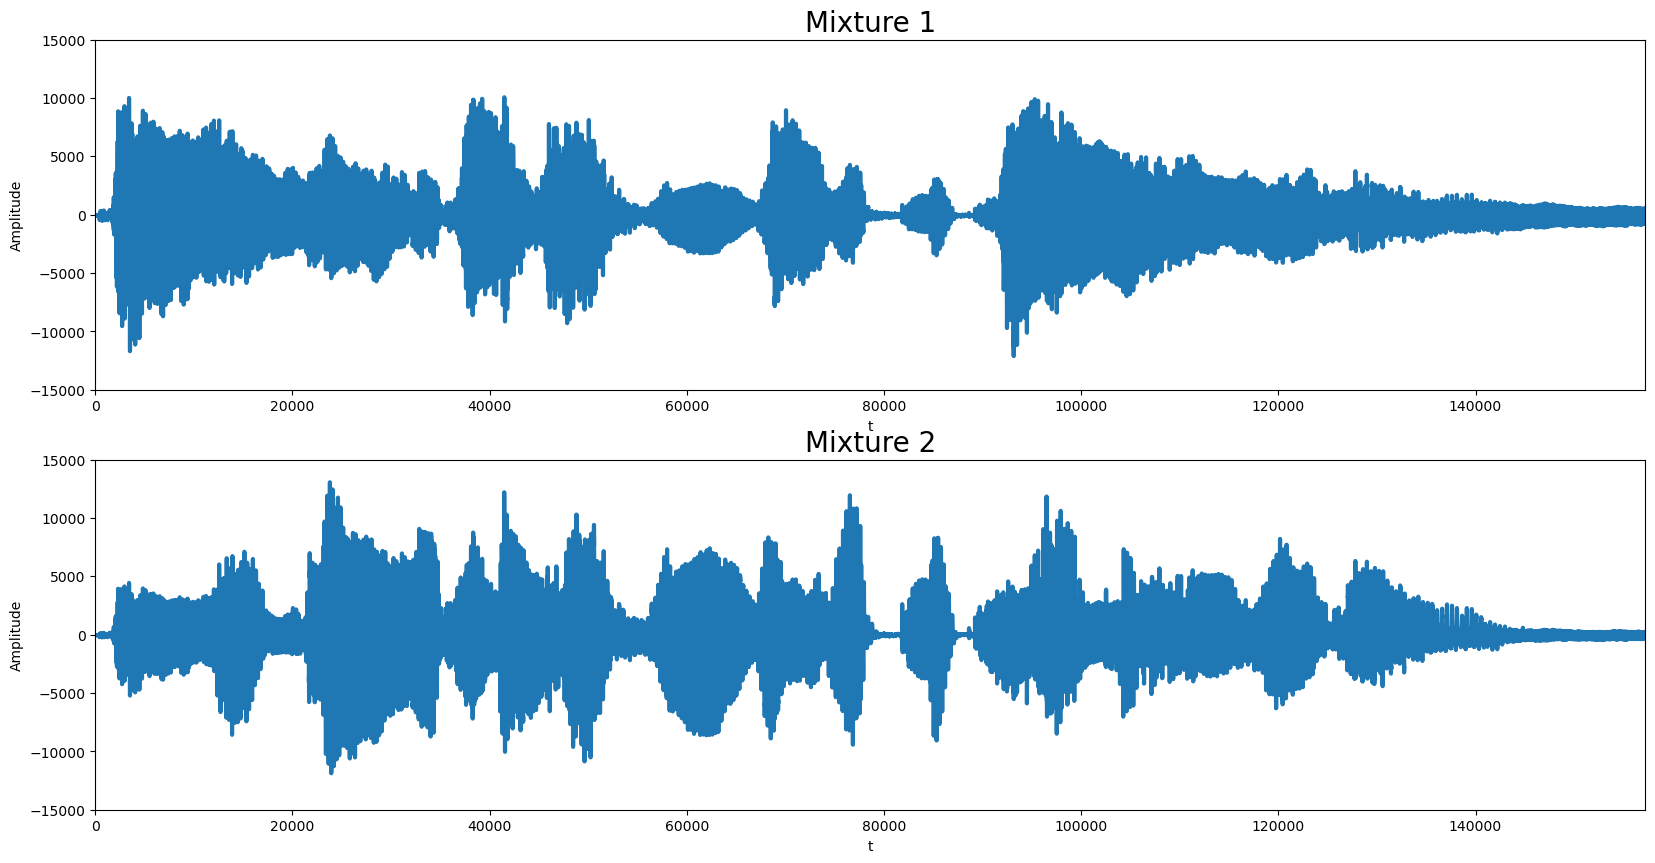

In [23]:
# Plotting the mixtures
plot_signals_sequential(t, X, "Mixture", scaling = 15000, xlim = t.shape[0], linewidth=3)

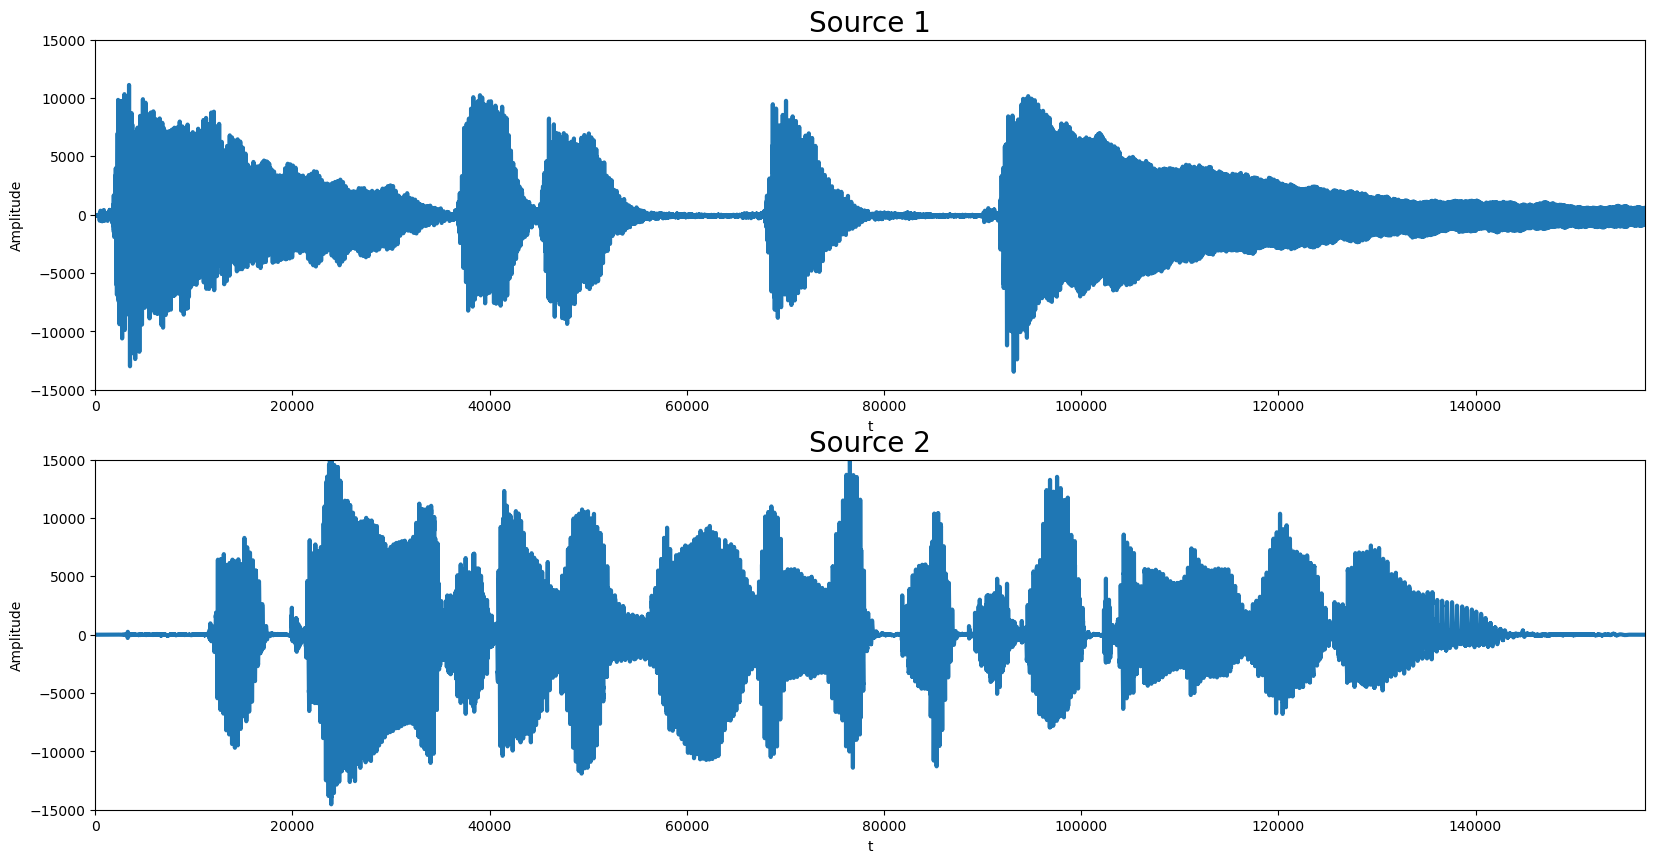

In [24]:
# Plotting the sources
plot_signals_sequential(t, S, "Source", scaling = 15000, xlim = t.shape[0], linewidth=3)

In [25]:
# Reconstructing the signals
S_recovered, W = FastIca(X, 2)

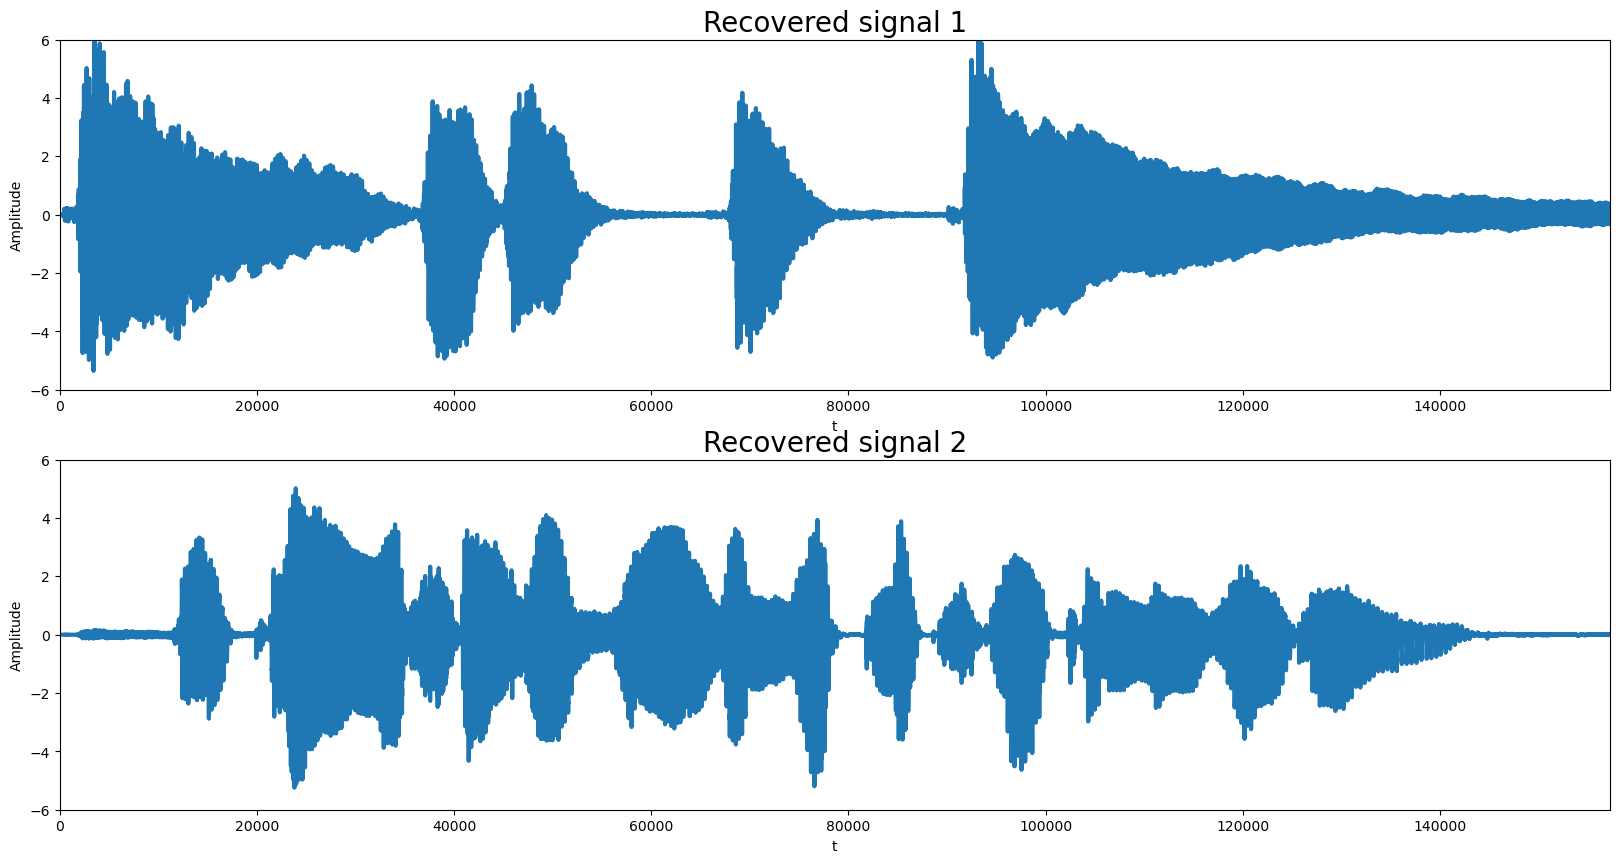

In [26]:
# Plotting the recovered signals
plot_signals_sequential(t, S_recovered, "Recovered signal", scaling = 6, xlim = t.shape[0], linewidth=3)

## Audio Playback

In [58]:
import sounddevice as sd

# Source 1
play_audio_from_array(S[1])

In [57]:
# Mixture 1
play_audio_from_array(X[1])

In [59]:
# Reconstruction 1
play_audio_from_array(S_recovered[1])

## Example 2: under-complete ICA

We now do the same as above but with 3 sources

In [37]:
# Mixing matrix
A = np.array([[0.9, 0.3],
              [0.4, 0.8],
              [0.1, 0.6],
              [0.7, 0.2]])


# Mixed signals
X = A @ S

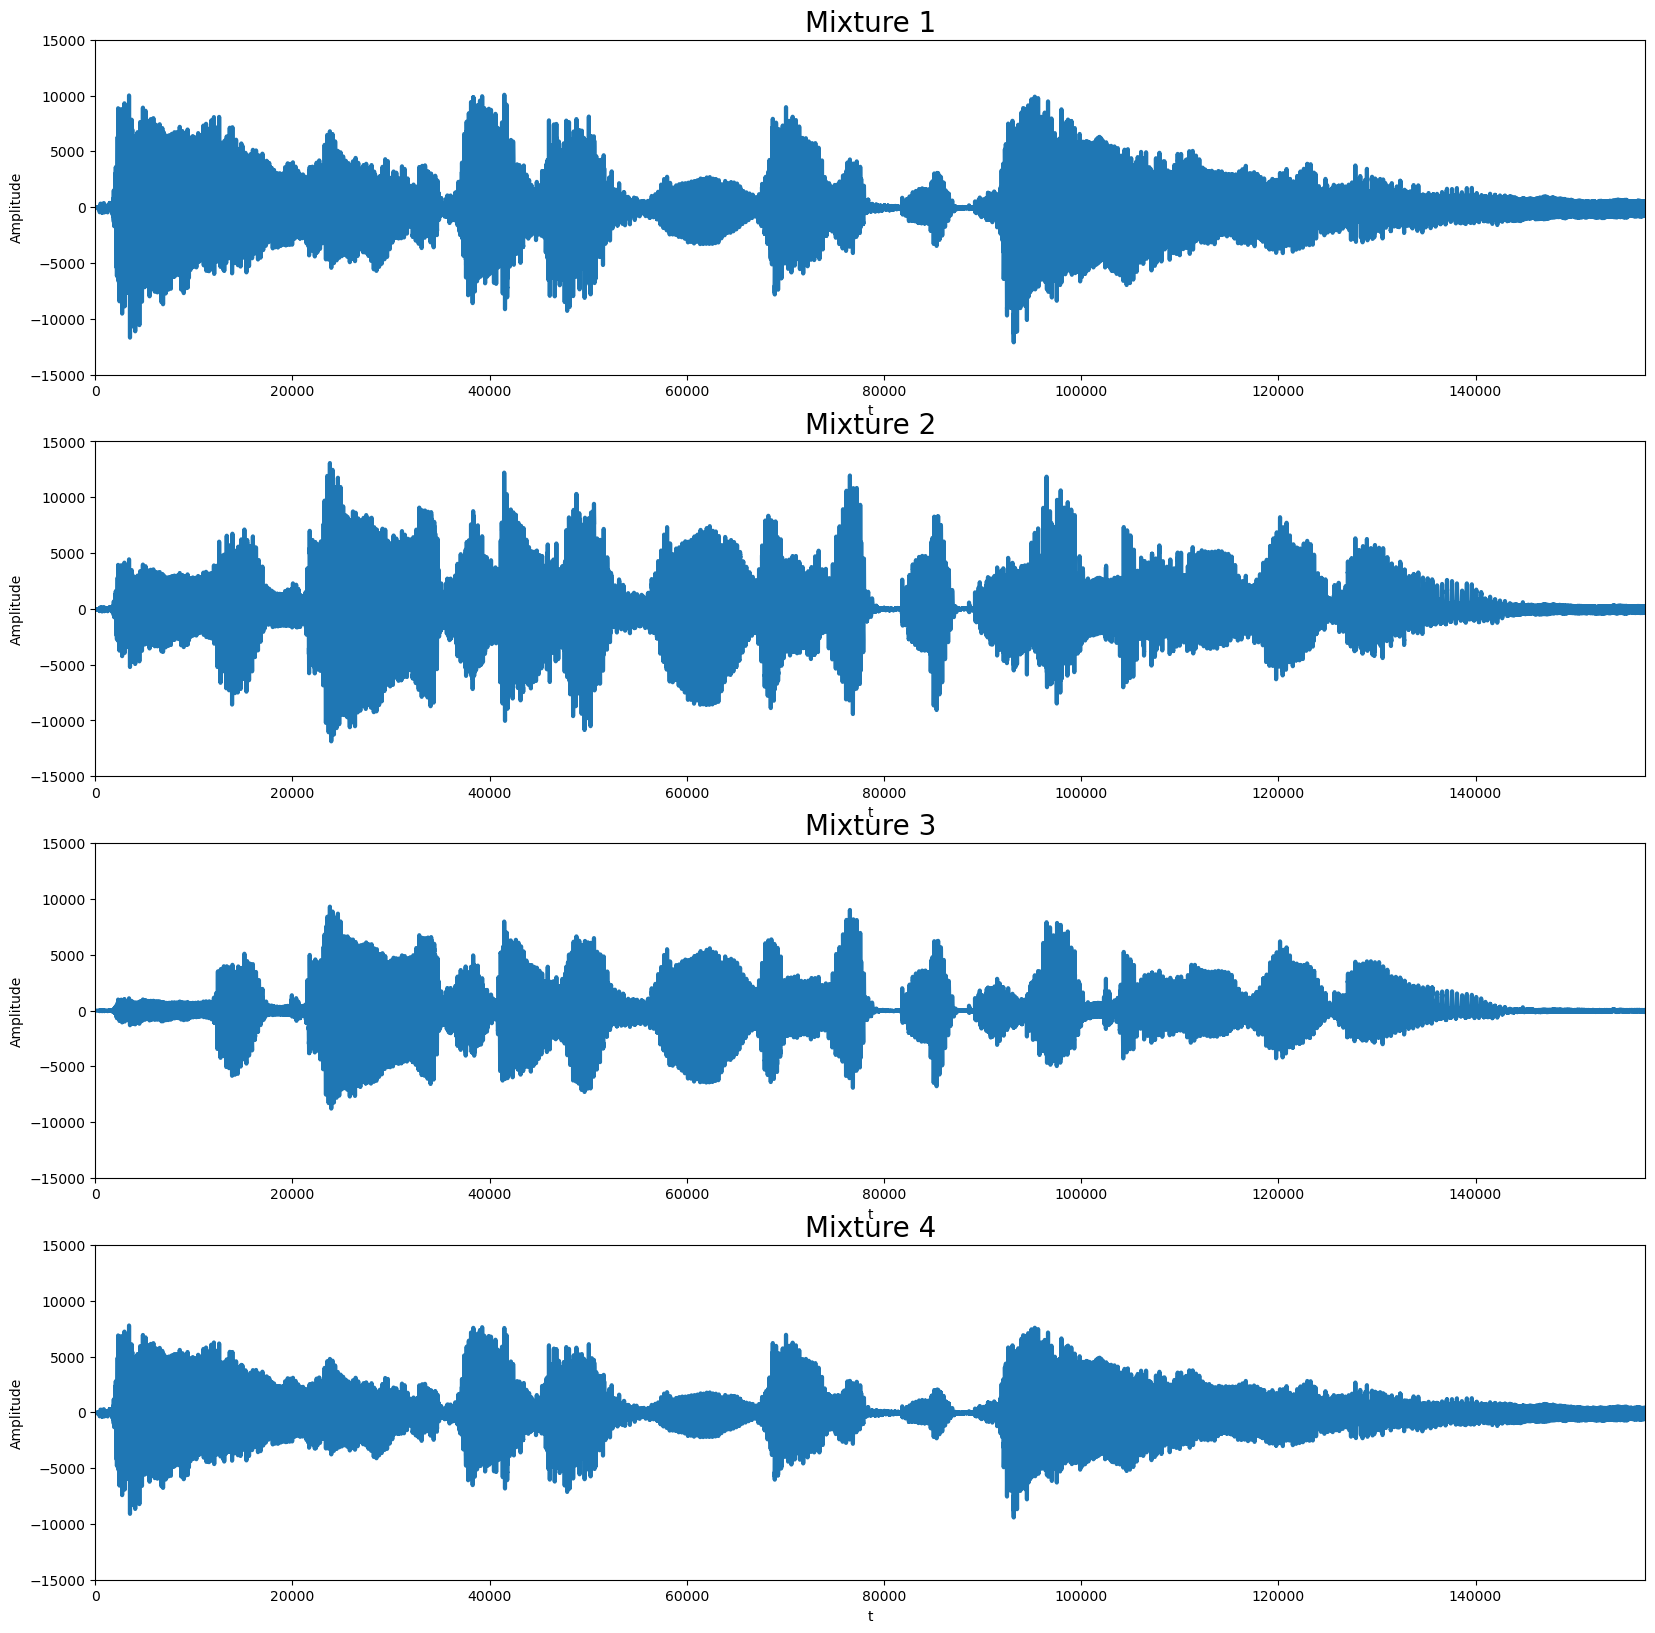

In [38]:
# Plotting the mixtures
plot_signals_sequential(t, X, "Mixture", scaling = 15000, xlim = t.shape[0], linewidth=3)

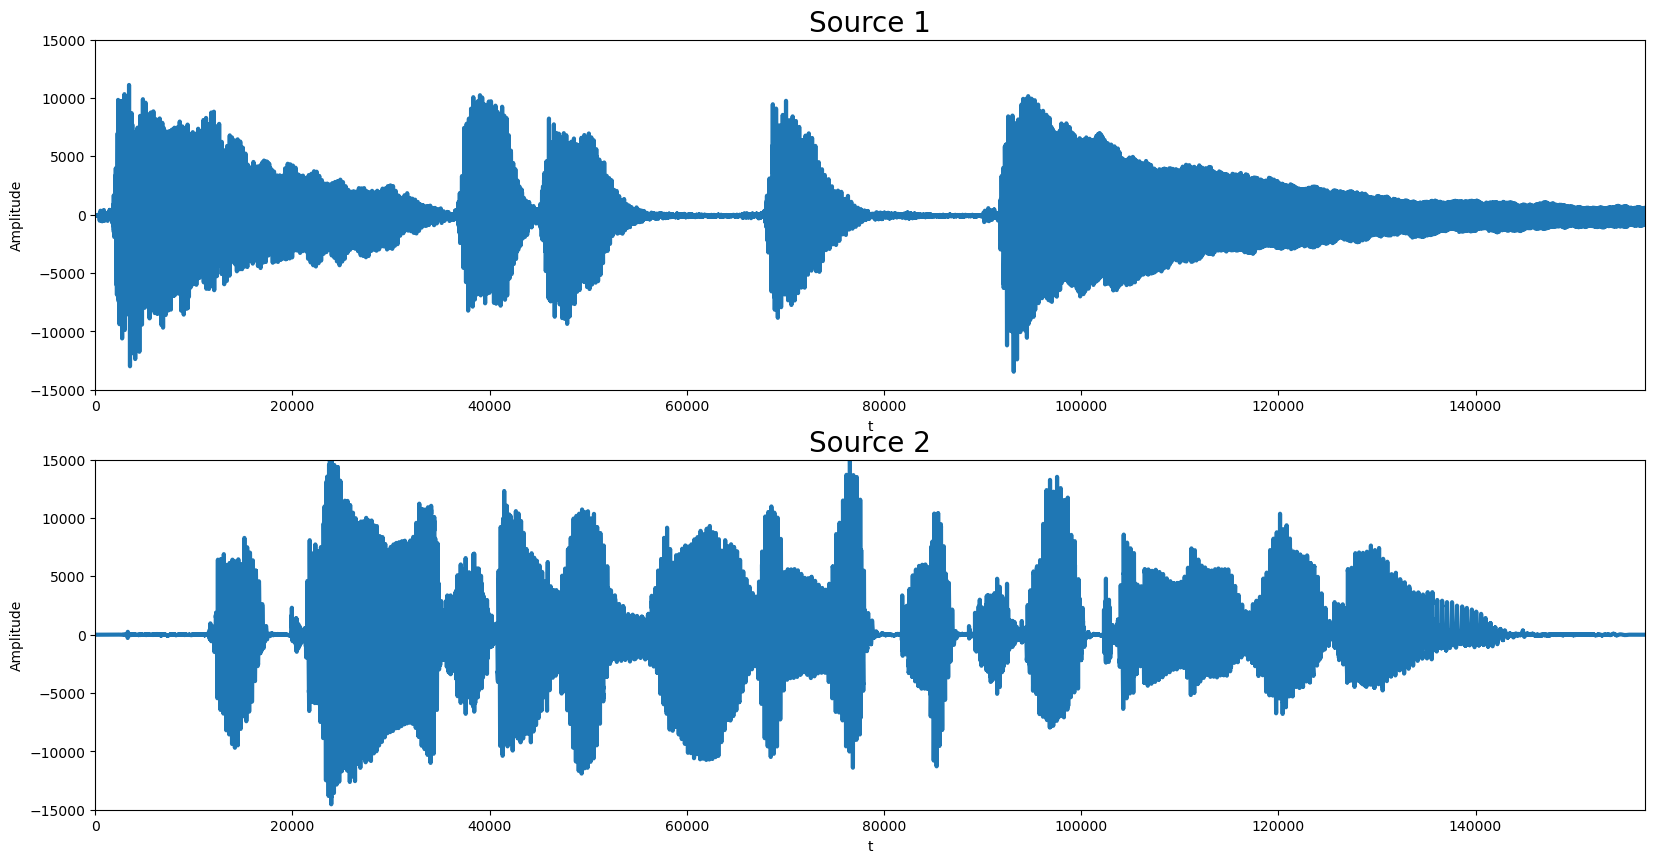

In [39]:
# Plotting the sources
plot_signals_sequential(t, S, "Source", scaling = 15000, xlim = t.shape[0], linewidth=3)

Dimensionality reduction performed


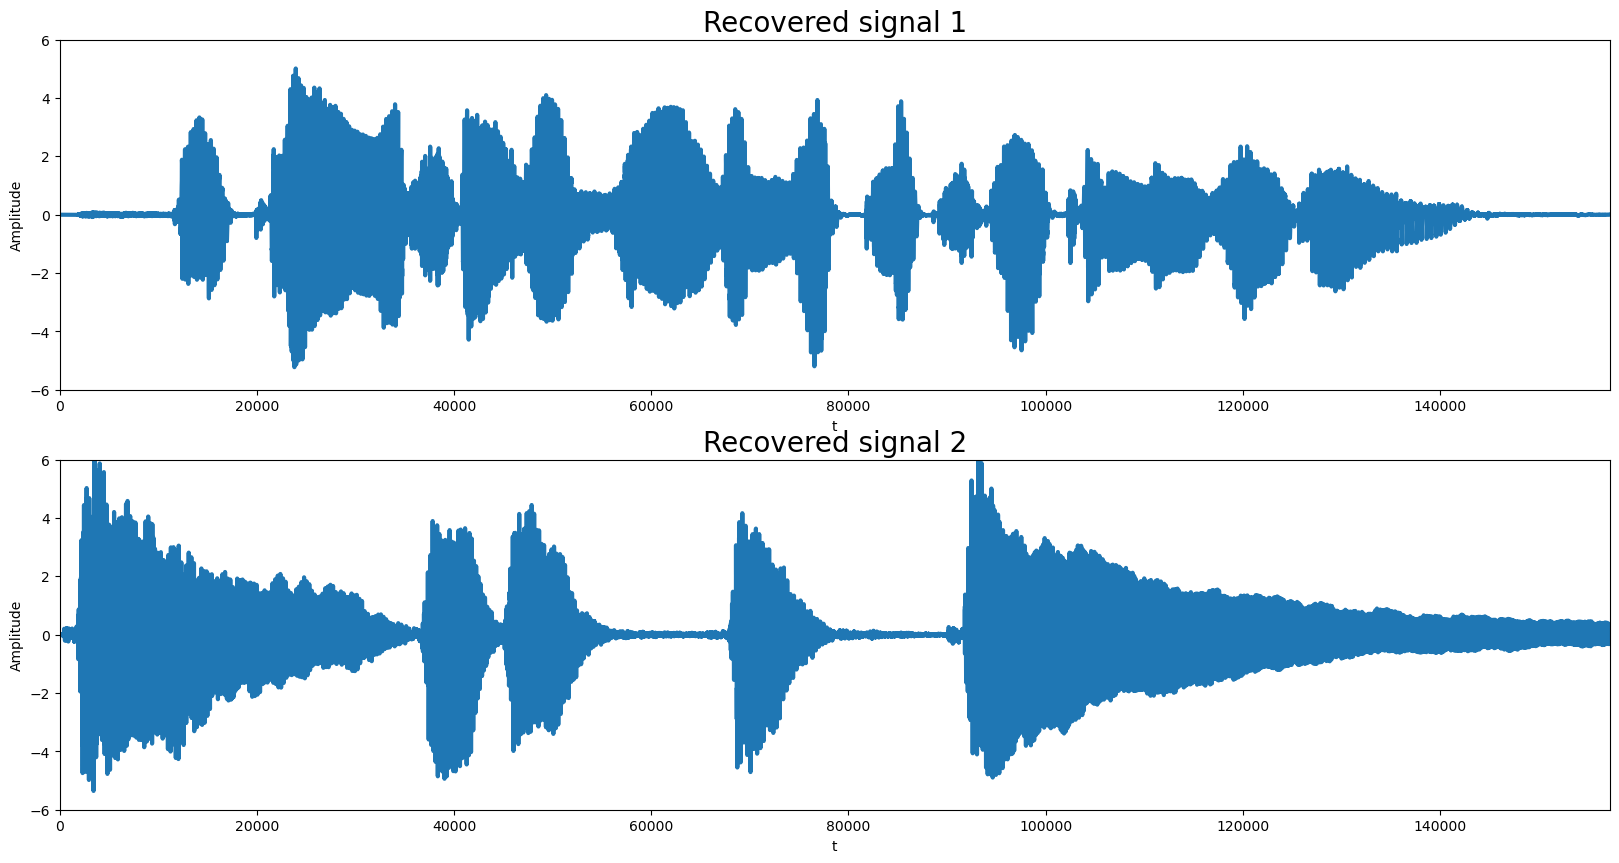

In [40]:
# Reconstructing the signals
S_recovered_2, W = FastIca(X, 2)

# Plotting the mixtures
plot_signals_sequential(t, S_recovered_2, "Recovered signal", scaling = 6, xlim = t.shape[0], linewidth=3)